In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import warnings
warnings.filterwarnings('ignore')

import nglview as nv
import MDAnalysis as mda
import numpy as np

from glycoshield.lib import glycoshield,glycotraj,glycosasa
from glycoshield.NGL import NGL



In [3]:

path="./tmp_files/"
tutorialpath="./TUTORIAL/"
input = '''#
A 462,463,464 1,2,3 GLYCAN_LIBRARY/Man5.pdb GLYCAN_LIBRARY/Man5_dt1000.xtc PATH/A_463.pdb PATH/A_463.xtc
A 491,492,493 1,2,3 GLYCAN_LIBRARY/Man5.pdb GLYCAN_LIBRARY/Man5_dt1000.xtc PATH/A_492.pdb PATH/A_492.xtc
A 532,533,534 1,2,3 GLYCAN_LIBRARY/Man5.pdb GLYCAN_LIBRARY/Man5_dt1000.xtc PATH/A_533.pdb PATH/A_533.xtc
B 462,463,464 1,2,3 GLYCAN_LIBRARY/Man5.pdb GLYCAN_LIBRARY/Man5_dt1000.xtc PATH/B_463.pdb PATH/B_463.xtc
B 491,492,493 1,2,3 GLYCAN_LIBRARY/Man5.pdb GLYCAN_LIBRARY/Man5_dt1000.xtc PATH/B_492.pdb PATH/B_492.xtc
B 532,533,534 1,2,3 GLYCAN_LIBRARY/Man5.pdb GLYCAN_LIBRARY/Man5_dt1000.xtc PATH/B_533.pdb PATH/B_533.xtc
'''.replace("PATH/",path)


with open(path+"input_sugaring_2chain",'w') as f:
    f.write(input)

In [7]:
gs = glycoshield(protpdb=tutorialpath+'EC5_2chain.pdb',protxtc=None,inputfile=path+'input_sugaring_2chain',path=path)

In [8]:

occupancy_single = gs.run()
print(occupancy_single)

Structure 0 residue 533: 100%|██████████| 3001/3001 [00:00<00:00, 3499.76it/s]


[[2619 1172  747 1263 1172 2569]]


In [9]:
ngl=NGL(path=path)

# How many glycan conformers to show? (reasonable performance if ~< 100)
showglycanframes = 30

# get the residues and chains:
chainlist=gs.chainlist
reslist=gs.reslist

for (chain,resid) in zip(chainlist,reslist):
    ngl.add_sugar(path+'{}_{}.pdb'.format(chain,resid),path+'{}_{}.xtc'.format(chain,resid),showglycanframes)

    
ngl.subsample()

In [10]:
v1=ngl.build_representation()
v1

('#009392', 1, 'A')
('#29878e', 2, 'A')
('#537b8a', 3, 'A')
('#7c6f86', 4, 'A')
('#a66382', 5, 'A')
('#d0587e', 6, 'A')


A Jupyter Widget

In [13]:
maxframe=np.min(occupancy_single[0]) 
pdblist=gs.pdblist
xtclist=gs.xtclist
chainlist=gs.chainlist
reslist=gs.reslist
# outname takes the desired root name of the output (the suffix '.xtc' and 'pdb' is appended automatically).
outname=path+"merged_traj"

glycotraj(maxframe,outname,pdblist,xtclist,chainlist,reslist,path=path)

In [14]:
u = mda.Universe(path+'merged_traj.pdb',path+'merged_traj.xtc')
t = nv.MDAnalysisTrajectory(u.atoms)
w = nv.NGLWidget(t)
w

A Jupyter Widget

In [ ]:

from glycoshield.lib import glycoshield,glycotraj,glycosasa

maxframe=np.min(occupancy_single[0]) 
maxframe=3 # temporary
pdblist=gs.pdblist
xtclist=gs.xtclist
chainlist=gs.chainlist
probelist=[0.14] # Possibly user will have an option to choose one value, makes it faster and easier to manage visualisation
plottrace=True
ndots=15
mode="max"
keepoutput=False

sasas = glycosasa(pdblist=pdblist,xtclist=xtclist,plottrace=plottrace,
          probelist=probelist,ndots=ndots,mode=mode,keepoutput=keepoutput,maxframe=maxframe,
          path=path,chainlist=chainlist)

# This will use 'maxframe' conformers of each glycan to calculate the shielding score. As an output, the user obtains a plot of shielding score along the protein sequence:



In [60]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
x=np.arange(100)
def fmt(x,pos):
    return labels[x]

In [64]:
formatter = FuncFormatter(fmt)

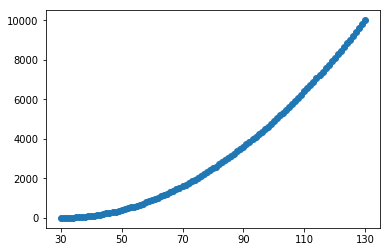

In [96]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(101)
labels={i:i+30 for i in x}

y = x**2


def MyTicks(x, pos):
    'The two args are the value and tick position'
    tick_locs=ax.xaxis.get_majorticklocs()      # Get the list of all tick locations
    tl = tick_locs[1:-1]
    if pos is not None:
        if x in tl and x in labels.keys():
            
            return labels[x]
        else:
            return ''


formatter = FuncFormatter(MyTicks)

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
plt.plot(x,y,'--o')
plt.show()


In [81]:
MyTicks(10,10)

'pos:10/x:10.0'